# Student Scores: EDA

# Load required Python packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores


**Print contents of data/interim.**

In [3]:
os.listdir(parent+'/data/interim')

['total_student_scores_without_dummies.csv',
 'cleaned_student_scores.csv',
 'student_scores_no_outliers.csv',
 'total_student_scores_dummies.csv']

# Load cleaned student scores into DataFrame

In [4]:
df = pd.read_csv(parent+'/data/interim/cleaned_student_scores.csv',index_col=0)

**Create Total Score Feature**

In [5]:
df['mean score'] = round((df['math score'] + df['reading score'] + df['writing score'])/3,1)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,4,standard,0,72,72,74,72.7
1,female,group C,2,standard,1,69,90,88,82.3
2,female,group B,5,standard,0,90,95,93,92.7
3,male,group A,3,free/reduced,0,47,57,44,49.3
4,male,group C,2,standard,0,76,78,75,76.3


In [7]:
df.shape

(1000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean score                   1000 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 78.1+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parental level of education,1000.0,2.0810,1.460333,0.0,1.00,2.0,3.0,5.0
test preparation course,1000.0,0.3580,0.479652,0.0,0.00,0.0,1.0,1.0
math score,1000.0,66.0890,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.1690,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.0540,15.195657,10.0,57.75,69.0,79.0,100.0
mean score,1000.0,67.7698,14.257197,9.0,58.30,68.3,77.7,100.0


In [10]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
lunch,1000,2,standard,645


## Convert object datatypes to categorical

In [11]:
obj_cols = ['gender','race/ethnicity','lunch']
df = df.astype({'gender':'category', 'race/ethnicity':'category', 'lunch':'category'})

In [12]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education       int64
lunch                          category
test preparation course           int64
math score                        int64
reading score                     int64
writing score                     int64
mean score                      float64
dtype: object

# Build data profile tables and plots

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parental level of education,1000.0,2.0810,1.460333,0.0,1.00,2.0,3.0,5.0
test preparation course,1000.0,0.3580,0.479652,0.0,0.00,0.0,1.0,1.0
math score,1000.0,66.0890,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.1690,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.0540,15.195657,10.0,57.75,69.0,79.0,100.0
mean score,1000.0,67.7698,14.257197,9.0,58.30,68.3,77.7,100.0


In [14]:
df.describe(include=['category']).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
lunch,1000,2,standard,645


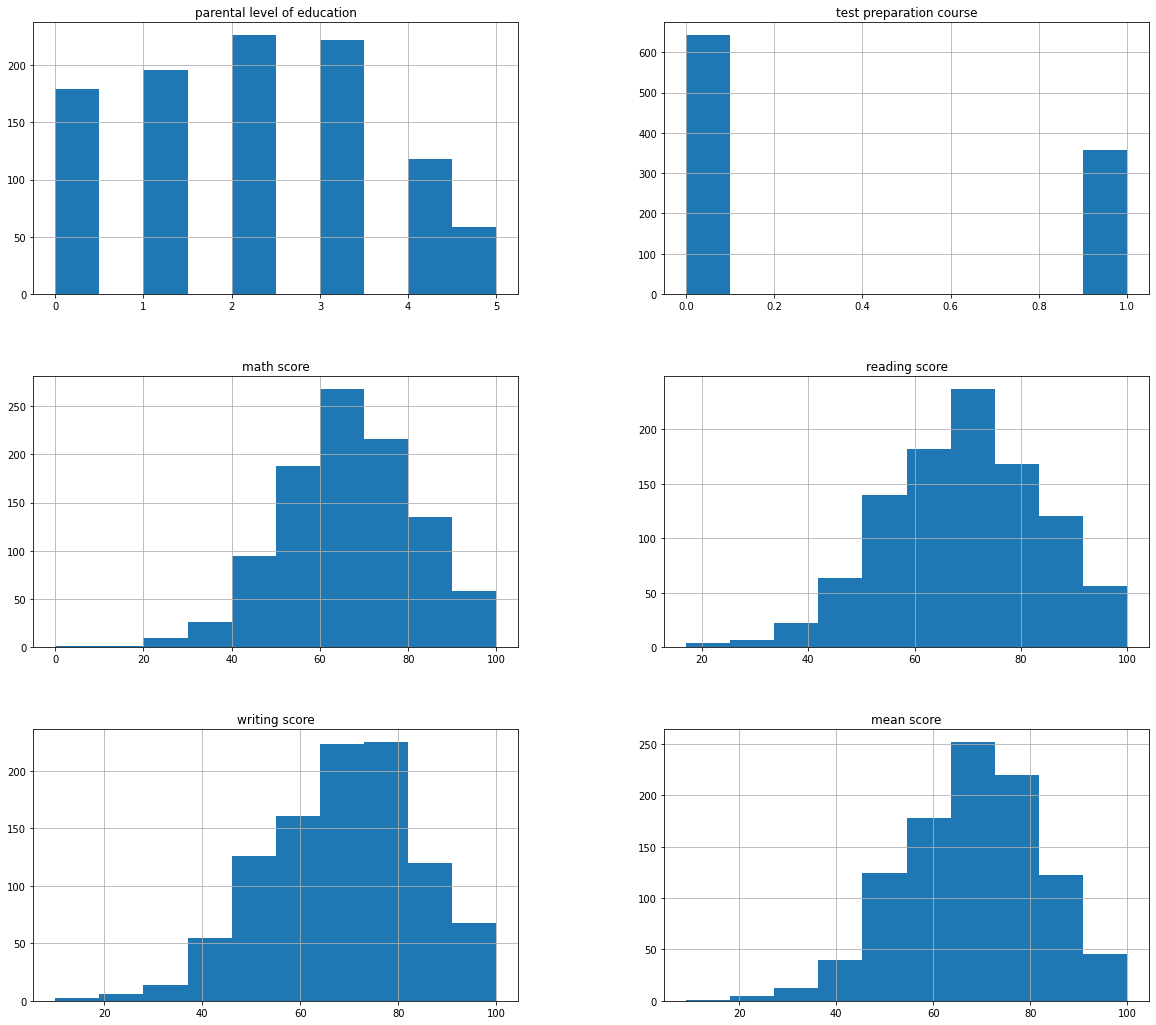

In [15]:
hist = df.hist(figsize=(20,18))

The math, reading, and writing score are used to calculated the mean score. All columns were left in for observational purposes.

The test scores all seem to have a close to normal distribution. This will be further examined.

# Anamolies & Outliers

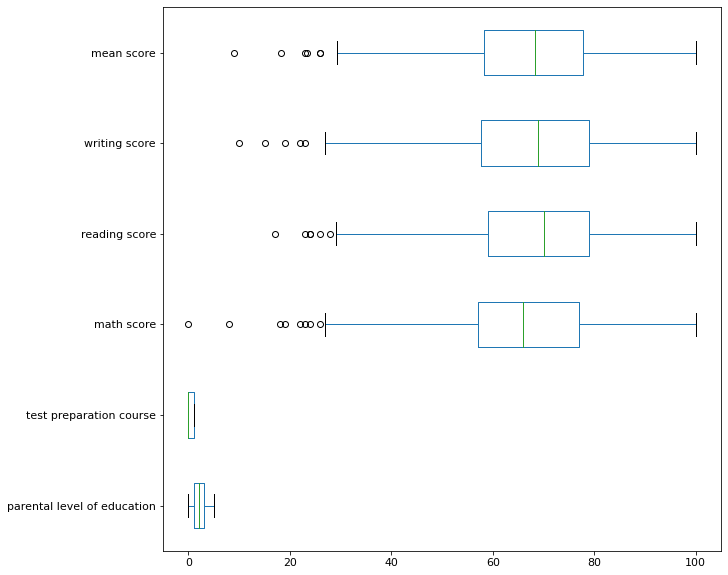

In [16]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=11, figsize=(10,10))

At this time, we will not remove outliers since we are searching for a solution for all students, not just the students performing within the norm.

Depending on prediction accuracy, we may revisit this step and try removing the outliers. Because of this, we will create a dataframe without outliers to save for later.

In [17]:
from scipy import stats
import numpy as np

#df_numeric = df[['reading score','writing score','math score']]

df_numeric = df[['mean score']]

# create array with z-scores
z = np.abs(stats.zscore(df_numeric))

# new dataframe without outliers
df_numeric_out = df_numeric[(z < 3).all(axis=1)]

In [18]:
df_numeric_out.shape

(996, 1)

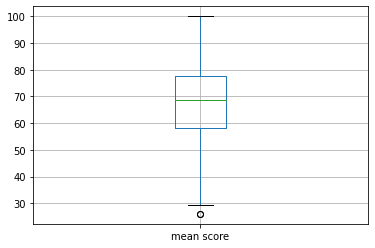

In [19]:
df_numeric_out.boxplot()

In [20]:
# Merge dataframes to ensure remaining data is retained
df_NO = df_numeric_out.merge(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','math score','reading score','writing score']], how='left', left_index=True, right_index=True)
df_NO = df_NO[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','math score','reading score','writing score', 'mean score']]
df_NO.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,4,standard,0,72,72,74,72.7
1,female,group C,2,standard,1,69,90,88,82.3
2,female,group B,5,standard,0,90,95,93,92.7
3,male,group A,3,free/reduced,0,47,57,44,49.3
4,male,group C,2,standard,0,76,78,75,76.3


In [21]:
df_NO.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean score'],
      dtype='object')

In [22]:
df_NO.shape

(996, 9)

In [23]:
df_NO.to_csv('../data/interim/student_scores_no_outliers.csv')

**To predict students who may benefit from additional support, we will focus on 'total score' as our dependent variable.**

mean: 67.7698
median: 68.3
standard deviation: 14.257197327512712
variance: 203.26767563563564


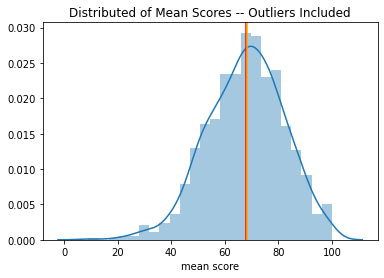

In [24]:
# Examine distribution of mean score with outliers

#hist = df['mean score'].hist()
sns.distplot(df['mean score'])
plt.title('Distributed of Mean Scores -- Outliers Included')
plt.axvline(x=df['mean score'].mean(), color='red')
plt.axvline(x=df['mean score'].median(), color='orange')

print('mean: {}'.format(df['mean score'].mean()))
print('median: {}'.format(df['mean score'].median()))
print('standard deviation: {}'.format(df['mean score'].std()))
import statistics
print('variance: {}'.format(statistics.variance(df['mean score'])))

mean: 67.96807228915662
median: 68.5
standard deviation: 13.9324358437964
variance: 194.1127685415027


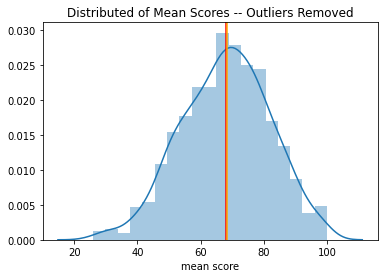

In [25]:
# Examine distribution of mean score with outliers REMOVED

#hist = df_NO['mean score'].hist()
sns.distplot(df_NO['mean score'])
plt.title('Distributed of Mean Scores -- Outliers Removed')
plt.axvline(x=df_NO['mean score'].mean(), color='red')
plt.axvline(x=df_NO['mean score'].median(), color='orange')

print('mean: {}'.format(df_NO['mean score'].mean()))
print('median: {}'.format(df_NO['mean score'].median()))
print('standard deviation: {}'.format(df_NO['mean score'].std()))
import statistics
print('variance: {}'.format(statistics.variance(df_NO['mean score'])))

# Explore data relationships

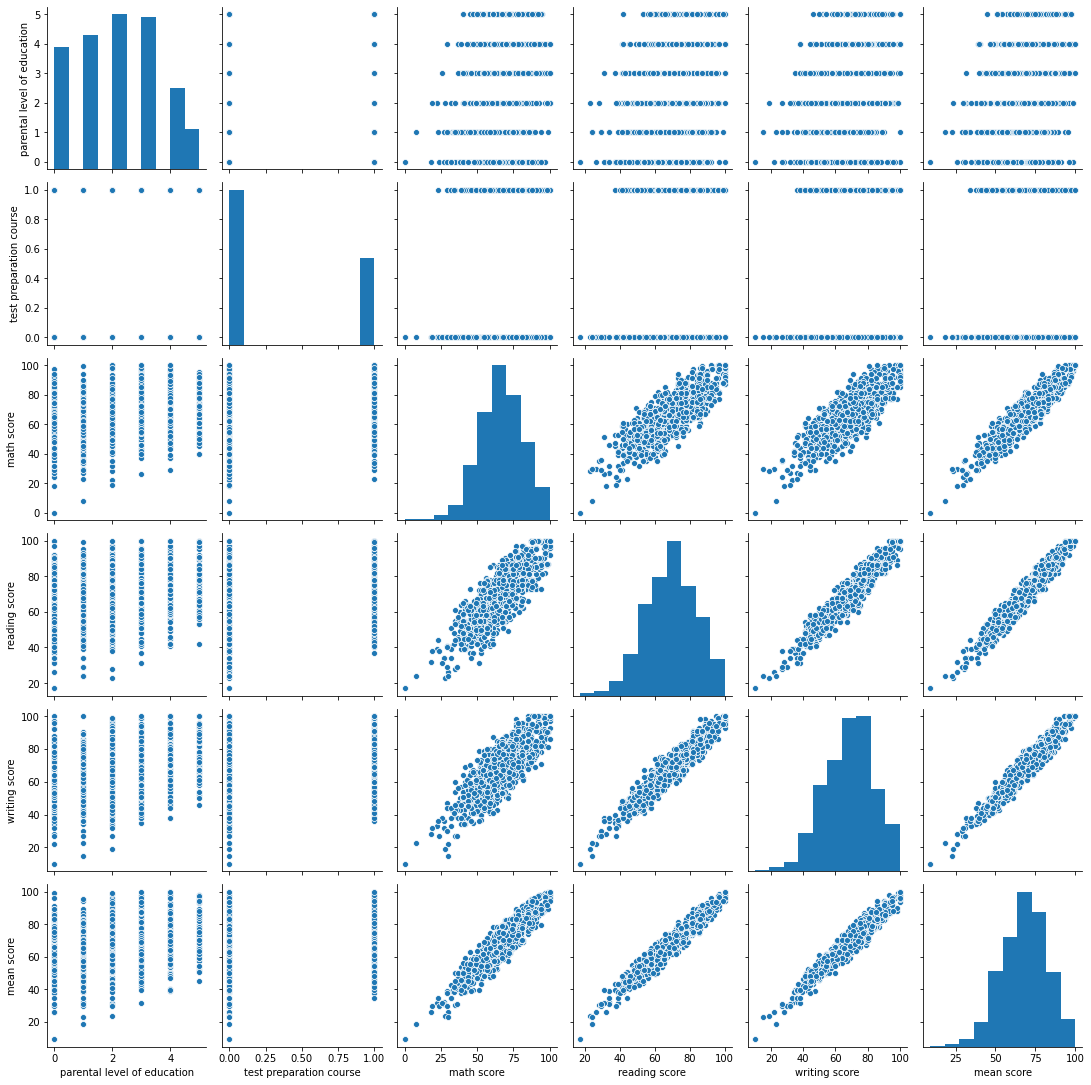

In [26]:
g = sns.pairplot(df)

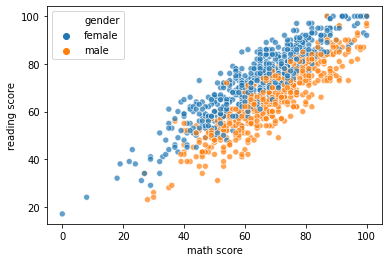

In [27]:
sns.scatterplot(x='math score',y='reading score',data=df,hue='gender',alpha=0.7)

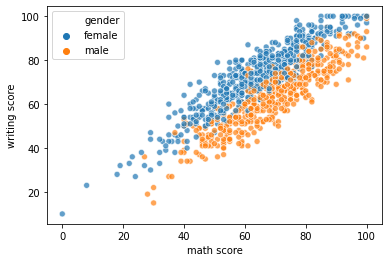

In [28]:
sns.scatterplot(x='math score',y='writing score',data=df,hue='gender',alpha=0.7)

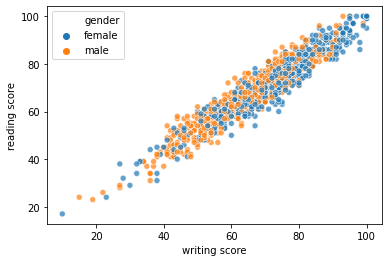

In [29]:
sns.scatterplot(x='writing score',y='reading score',data=df,hue='gender',alpha=0.7)

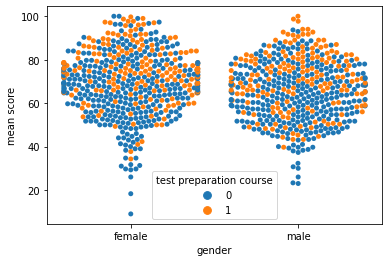

In [30]:
sns.swarmplot(x='gender',y='mean score',data=df,hue='test preparation course')

female mean: 69.56949806949807
female median: 70.3
female standard deviation: 14.54041111042432
female variance: 211.423555260151

male mean: 65.83568464730291
male median: 66.3
male standard deviation: 13.69990259188601
male variance: 187.68733102716504

P-value: 3.157950262038988e-05
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


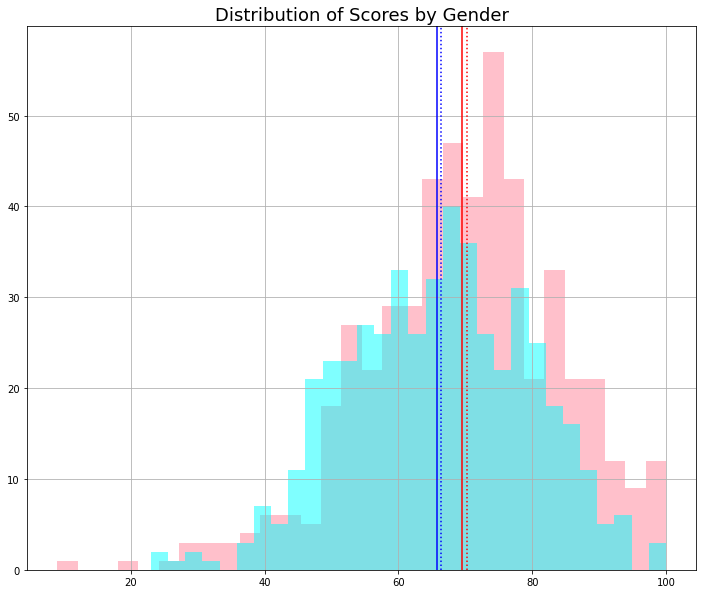

In [31]:
# Compare genders
female = df[df['gender'] == 'female']             
male = df[df['gender'] == 'male']


plt.figure(figsize=(12,10))
hist = female['mean score'].hist(bins=30, color='pink')
hist = male['mean score'].hist(bins=30, color='cyan',alpha=0.5)

plt.title('Distribution of Scores by Gender', fontsize=18)
plt.axvline(x=female['mean score'].mean(), color='red')
plt.axvline(x=female['mean score'].median(), linestyle='dotted',color='red')
plt.axvline(x=male['mean score'].mean(), color='blue')
plt.axvline(x=male['mean score'].median(), linestyle='dotted',color='blue')


print('female mean: {}'.format(female['mean score'].mean()))
print('female median: {}'.format(female['mean score'].median()))
print('female standard deviation: {}'.format(female['mean score'].std()))
print('female variance: {}\n'.format(statistics.variance(female['mean score'])))

print('male mean: {}'.format(male['mean score'].mean()))
print('male median: {}'.format(male['mean score'].median()))
print('male standard deviation: {}'.format(male['mean score'].std()))
print('male variance: {}'.format(statistics.variance(male['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=male['mean score'],b=female['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

test prep mean: 72.66955307262569
test prep median: 73.5
test prep standard deviation: 13.038673151774303
test prep variance: 170.00699755880007

no test prep mean: 65.03753894080997
no test prep median: 65.3
no test prep standard deviation: 14.185340222958029
no test prep variance: 201.22387724107094

P-value: 4.3812454555639705e-17
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


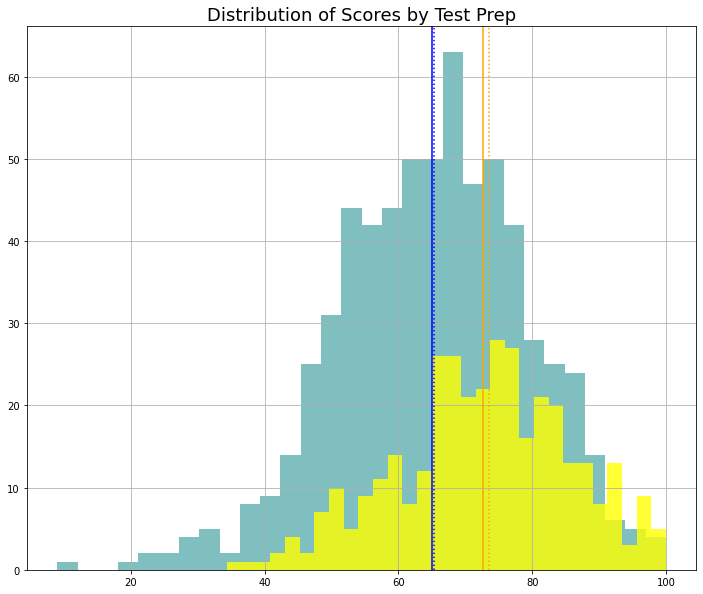

In [32]:
# Compare test prep distribution
prep = df[df['test preparation course'] == 1]             
no_prep = df[df['test preparation course'] == 0]


plt.figure(figsize=(12,10))
hist = no_prep['mean score'].hist(bins=30, color='teal',alpha=0.5)
hist = prep['mean score'].hist(bins=30, color='yellow',alpha=0.8)

plt.title('Distribution of Scores by Test Prep', fontsize=18)
plt.axvline(x=prep['mean score'].mean(), color='orange')
plt.axvline(x=prep['mean score'].median(), linestyle='dotted',color='orange')
plt.axvline(x=no_prep['mean score'].mean(), color='blue')
plt.axvline(x=no_prep['mean score'].median(), linestyle='dotted',color='blue')


print('test prep mean: {}'.format(prep['mean score'].mean()))
print('test prep median: {}'.format(prep['mean score'].median()))
print('test prep standard deviation: {}'.format(prep['mean score'].std()))
print('test prep variance: {}\n'.format(statistics.variance(prep['mean score'])))

print('no test prep mean: {}'.format(no_prep['mean score'].mean()))
print('no test prep median: {}'.format(no_prep['mean score'].median()))
print('no test prep standard deviation: {}'.format(no_prep['mean score'].std()))
print('no test prep variance: {}'.format(statistics.variance(no_prep['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=prep['mean score'],b=no_prep['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

Free Lunch / Orange and Red
free lunch mean: 62.19830985915493
free lunch median: 62.7
free lunch standard deviation: 14.45796937648184
free lunch variance: 209.0328784912867

Standard Lunch / Purple and Blue
standard lunch mean: 70.83627906976743
standard lunch median: 71.3
standard lunch standard deviation: 13.186544470682174
standard lunch variance: 173.88495507727865

P-value: 1.5834783956915416e-19
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


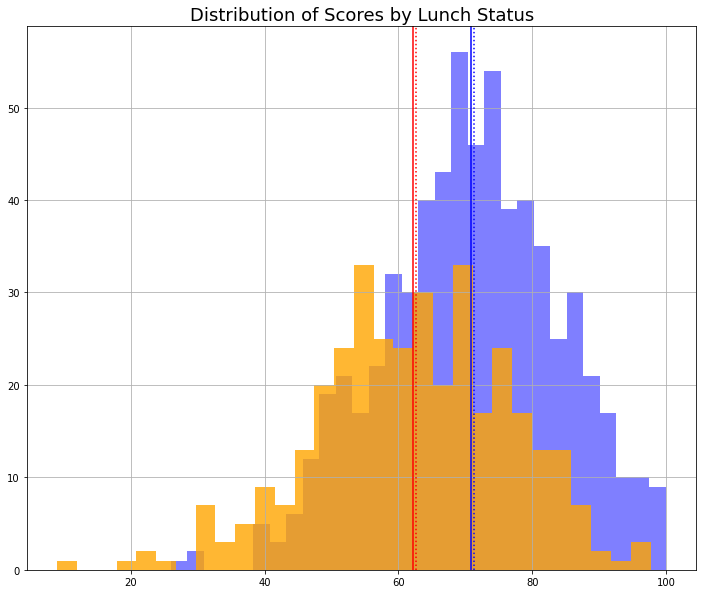

In [33]:
# Compare lunch status distribution without outliers
free = df[df['lunch'] == 'free/reduced']             
standard = df[df['lunch'] == 'standard']


plt.figure(figsize=(12,10))
hist = standard['mean score'].hist(bins=30, color='blue',alpha=0.5)
hist = free['mean score'].hist(bins=30, color='orange',alpha=0.8)

plt.title('Distribution of Scores by Lunch Status', fontsize=18)
plt.axvline(x=free['mean score'].mean(), color='red')
plt.axvline(x=free['mean score'].median(), linestyle='dotted',color='red')
plt.axvline(x=standard['mean score'].mean(), color='blue')
plt.axvline(x=standard['mean score'].median(), linestyle='dotted',color='blue')

print('Free Lunch / Orange and Red')
print('free lunch mean: {}'.format(free['mean score'].mean()))
print('free lunch median: {}'.format(free['mean score'].median()))
print('free lunch standard deviation: {}'.format(free['mean score'].std()))
print('free lunch variance: {}\n'.format(statistics.variance(free['mean score'])))

print('Standard Lunch / Purple and Blue')
print('standard lunch mean: {}'.format(standard['mean score'].mean()))
print('standard lunch median: {}'.format(standard['mean score'].median()))
print('standard lunch standard deviation: {}'.format(standard['mean score'].std()))
print('standard lunch variance: {}'.format(statistics.variance(standard['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=free['mean score'],b=standard['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

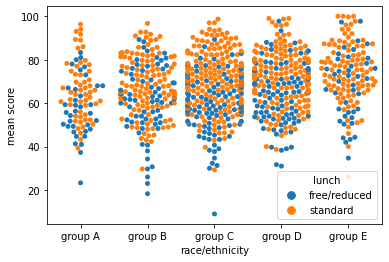

In [34]:
sns.swarmplot(x='race/ethnicity',y='mean score',data=df,hue='lunch')

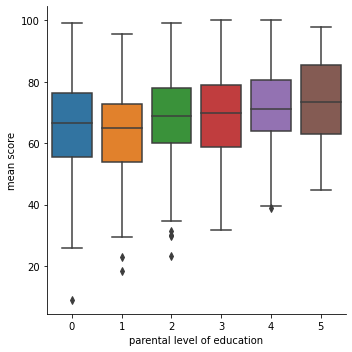

In [35]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box')

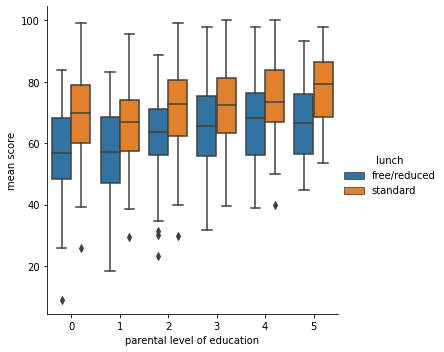

In [36]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box',hue='lunch')

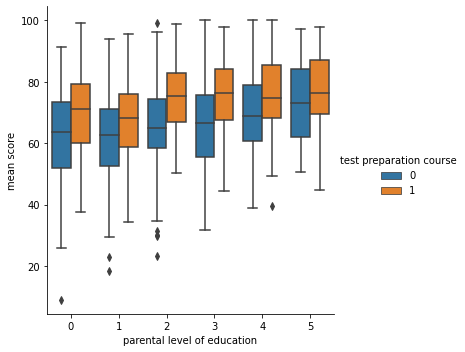

In [37]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box', hue='test preparation course')

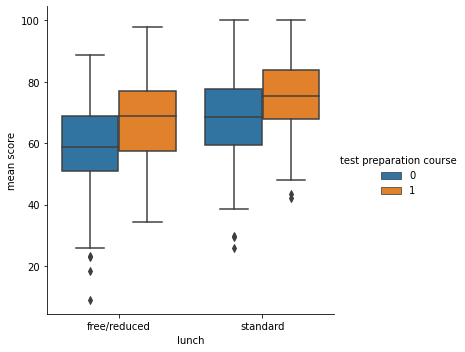

In [38]:
sns.catplot(x='lunch',y='mean score',data=df,kind='box', hue='test preparation course')

# Feature Selection and Engineering
**Mean score** has already been created by taking the mean (average) of the three test scores (reading, writing, math).


In [39]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education       int64
lunch                          category
test preparation course           int64
math score                        int64
reading score                     int64
writing score                     int64
mean score                      float64
dtype: object

In [40]:
# Correlation Matrix
corr_all = df.corr(method='pearson')
corr_all.round(2).style.background_gradient(cmap='coolwarm')

,parental level of education,test preparation course,math score,reading score,writing score,mean score
parental level of education,1.000000,-0.010000,0.160000,0.190000,0.240000,0.210000
test preparation course,-0.010000,1.000000,0.180000,0.240000,0.310000,0.260000
math score,0.160000,0.180000,1.000000,0.820000,0.800000,0.920000
reading score,0.190000,0.240000,0.820000,1.000000,0.950000,0.970000
writing score,0.240000,0.310000,0.800000,0.950000,1.000000,0.970000
mean score,0.210000,0.260000,0.920000,0.970000,0.970000,1.000000


It's interesting to see that the test preparation course and parental level of education have a slightly higher correlation with writing scores than with the math score. The level of parental education correlated with total score aligns with a study done by Betty Hart and Todd Risley in the mid-1980's.

According to a study, 'Children in professionals' homes were exposed to an average of more than fifteen hundred more spoken words per hour than children in welfare homes. Over one year, that amounted to a difference of nearly 8 million words, which, by age four, amounted to a total gap of 32 million words. They also found a substantial gap in tone and in the complexity of words being used. As they crunched the numbers, they discovered a direct correlation between the intensity of these early verbal experiences and later achievement.' An article by The Atlantic about this study can be found [here](https://www.theatlantic.com/technology/archive/2010/03/the-32-million-word-gap/36856/).

In [41]:
# Without Outliers
corr_NO = df_NO.corr(method='pearson')
corr_NO.round(2).style.background_gradient(cmap='coolwarm')

,parental level of education,test preparation course,math score,reading score,writing score,mean score
parental level of education,1.000000,-0.010000,0.150000,0.190000,0.230000,0.200000
test preparation course,-0.010000,1.000000,0.170000,0.240000,0.310000,0.250000
math score,0.150000,0.170000,1.000000,0.810000,0.790000,0.920000
reading score,0.190000,0.240000,0.810000,1.000000,0.950000,0.970000
writing score,0.230000,0.310000,0.790000,0.950000,1.000000,0.960000
mean score,0.200000,0.250000,0.920000,0.970000,0.960000,1.000000


We notice that when outliers are dropped, there is a slight decrease in correlation among features. Due to this, we are going to keep outliers in for future analysis.

### Remove redundant variables
When creating a model in the next couple notebooks, the total score will be the predicted variable. Due to this, all highly correlated (above 95%) features will be removed to ensure appropriate prediction using features unknown prior to the testing.

In [42]:
# Drop score-related variables, keeping total score
df = df.drop(['math score','writing score','reading score'], axis=1)

In [43]:
df.shape

(1000, 6)

## Save total student score data to new csv

In [44]:
df.to_csv(parent+'/data/interim/total_student_scores_without_dummies.csv')